In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
from nltk.stem import WordNetLemmatizer

In [12]:
# reading the csv
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Completed Projects\Capstone Project\data_contains_no_blank_in_skills.csv")

In [13]:
# Dropping unnecessary columns
df=df.drop('Unnamed: 0',axis=1,errors='ignore')

In [14]:
df

,Job_Name,Company,City,Job_type,Employees,Followers,Applicants,Industry,Level,Involvment,Job_Desception,skills,Job_skills,skills_skills
0,"Sales Specialist, Amazon Shipping",Amazon,Delhi,On-site,10001,821695,200,Computer Software,Entry level,Full-time,Responsible for onboarding & account managing ...,Communication Customer Interaction Oral Commun...,"'smbs', 'india', 'smb', 'amazon shipping', 'in...",'skills presentations'
1,Process Associate-BFS025462,Genpact,Jaipur,On-site,10001,130023,137,Information Technology & Services,Entry level,Full-time,"Premium application, reinstatement, renewal of...",Business Process Outsourcing (BPO) Cash Applic...,"'erp', 'english'","'business', 'process outsourcing', 'bpo', 'cas..."
2,Assistant Manager- OTC Collections FLM role-HM...,Genpact,Pune,On-site,10001,130023,137,Information Technology & Services,Associate,Full-time,"Managing the team of 15-20 employees, manging ...",Analytical Skills Cash Collection Communicatio...,"'partner', 'erp'","'skills cash collection', 'dispute resolution'..."
3,Assistant Manager - FOSA Analyst,IndiGo (InterGlobe Aviation Ltd),Gurgaon,On-site,10001,18874,87,Airlines/Aviation,Mid-Senior level,Full-time,"Downloading, Extracting and Cleansing of MS fo...",Analytics Business Analytics Communication Dat...,"'downloading', 'fosa', 'database', 'analysis',...",'business analytics communication data analysi...
4,Billing/Collections Supervisor,UPS,Pune,On-site,10001,143796,64,Transportation/Trucking/Railroad,Mid-Senior level,Full-time,Explore your next opportunity at a Fortune Glo...,A/R Collections Accounts Receivable (AR) Cash ...,"'ups', 'small package', 'sp brokerage', 'logis...","'cash collection contact', 'centers debt colle..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Lead Control Management Officer,Wells Fargo,Hyderabad,On-site,"10,001","2,06,991",3,Financial Services,Mid-Senior level,Full-time,Providing high quality risk management deliver...,CommunicationAttention to Detail Business Init...,"'technology', 'business risk', 'control', 'per...","'communicationattention', 'detail business ini..."
3204,Senior Software Engineer,Wells Fargo,Hyderabad,Hybrid,"10,001","2,06,991",4,Financial Services,Mid-Senior level,Full-time,"Position Overview, Design, write and build app...",Android Jetpack Code Review Computer Science D...,"'position overview', 'design', 'android'","'android', 'jetpack code review computer scien..."
3205,Job openings on PL/SQL Developer,ESSENWARE PRIVATE LIMITED,Mumbai,On-site,51,33,41,Information Technology & Services,Entry level,Full-time,#Hiring for PL SQL Developer and will be deplo...,SQLDatabase Triggers Oracle Database PL/SQL Pe...,"'pl', 'client', 'mnc', 'cmmil5'","'sqldatabase', 'triggers oracle database', 'ss..."
3206,IT Recruiter,SPAR Solutions,Pune,On-site,51,125,136,Information Technology & Services,Entry level,Full-time,Write and post technical job descriptions on d...,CommunicationApplicant Tracking Systems Boolea...,"'write', 'source', 'naukri', 'parse', 'perform...","'systems boolean searching databases', 'portal..."


In [15]:
# Function for string to lower
def Convert_lower(df,columns):
    for c in columns:
        df[c]=df[c].str.lower()
        df[c]=df[c].str.strip()
    return df

In [16]:
# Using function to convert skills into lowercase
Convert_lower(df=df,columns=['skills'])

,Job_Name,Company,City,Job_type,Employees,Followers,Applicants,Industry,Level,Involvment,Job_Desception,skills,Job_skills,skills_skills
0,"Sales Specialist, Amazon Shipping",Amazon,Delhi,On-site,10001,821695,200,Computer Software,Entry level,Full-time,Responsible for onboarding & account managing ...,communication customer interaction oral commun...,"'smbs', 'india', 'smb', 'amazon shipping', 'in...",'skills presentations'
1,Process Associate-BFS025462,Genpact,Jaipur,On-site,10001,130023,137,Information Technology & Services,Entry level,Full-time,"Premium application, reinstatement, renewal of...",business process outsourcing (bpo) cash applic...,"'erp', 'english'","'business', 'process outsourcing', 'bpo', 'cas..."
2,Assistant Manager- OTC Collections FLM role-HM...,Genpact,Pune,On-site,10001,130023,137,Information Technology & Services,Associate,Full-time,"Managing the team of 15-20 employees, manging ...",analytical skills cash collection communicatio...,"'partner', 'erp'","'skills cash collection', 'dispute resolution'..."
3,Assistant Manager - FOSA Analyst,IndiGo (InterGlobe Aviation Ltd),Gurgaon,On-site,10001,18874,87,Airlines/Aviation,Mid-Senior level,Full-time,"Downloading, Extracting and Cleansing of MS fo...",analytics business analytics communication dat...,"'downloading', 'fosa', 'database', 'analysis',...",'business analytics communication data analysi...
4,Billing/Collections Supervisor,UPS,Pune,On-site,10001,143796,64,Transportation/Trucking/Railroad,Mid-Senior level,Full-time,Explore your next opportunity at a Fortune Glo...,a/r collections accounts receivable (ar) cash ...,"'ups', 'small package', 'sp brokerage', 'logis...","'cash collection contact', 'centers debt colle..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Lead Control Management Officer,Wells Fargo,Hyderabad,On-site,"10,001","2,06,991",3,Financial Services,Mid-Senior level,Full-time,Providing high quality risk management deliver...,communicationattention to detail business init...,"'technology', 'business risk', 'control', 'per...","'communicationattention', 'detail business ini..."
3204,Senior Software Engineer,Wells Fargo,Hyderabad,Hybrid,"10,001","2,06,991",4,Financial Services,Mid-Senior level,Full-time,"Position Overview, Design, write and build app...",android jetpack code review computer science d...,"'position overview', 'design', 'android'","'android', 'jetpack code review computer scien..."
3205,Job openings on PL/SQL Developer,ESSENWARE PRIVATE LIMITED,Mumbai,On-site,51,33,41,Information Technology & Services,Entry level,Full-time,#Hiring for PL SQL Developer and will be deplo...,sqldatabase triggers oracle database pl/sql pe...,"'pl', 'client', 'mnc', 'cmmil5'","'sqldatabase', 'triggers oracle database', 'ss..."
3206,IT Recruiter,SPAR Solutions,Pune,On-site,51,125,136,Information Technology & Services,Entry level,Full-time,Write and post technical job descriptions on d...,communicationapplicant tracking systems boolea...,"'write', 'source', 'naukri', 'parse', 'perform...","'systems boolean searching databases', 'portal..."


In [17]:
# Checking for the null values
df.isnull().sum()

Job_Name           0
Company            0
City               0
Job_type           0
Employees          0
Followers          0
Applicants         0
Industry          18
Level              0
Involvment         0
Job_Desception     0
skills             0
Job_skills         0
skills_skills      0
dtype: int64

In [18]:
# filling null values with 0
df.fillna(0,inplace=True)
# filter the dataframe where industry is not equals to zero
df=df[df['Industry']!=0]

In [19]:
# Getting information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3207
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Job_Name        3190 non-null   object
 1   Company         3190 non-null   object
 2   City            3190 non-null   object
 3   Job_type        3190 non-null   object
 4   Employees       3190 non-null   object
 5   Followers       3190 non-null   object
 6   Applicants      3190 non-null   object
 7   Industry        3190 non-null   object
 8   Level           3190 non-null   object
 9   Involvment      3190 non-null   object
 10  Job_Desception  3190 non-null   object
 11  skills          3190 non-null   object
 12  Job_skills      3190 non-null   object
 13  skills_skills   3190 non-null   object
dtypes: object(14)
memory usage: 373.8+ KB


In [20]:
# Created function to get skills from job description column
def skills(x):
    text = x
    word = nltk.word_tokenize(text) 
    pos_tag = nltk.pos_tag(word) 
    chunk = nltk.ne_chunk(pos_tag)
    NE = [" ".join(w for w , t in ele) for ele in chunk if isinstance(ele,nltk.Tree)]
    St = str(NE).lower()
    nt = St[1:-1]
    
    return nt

In [21]:
# typecasting the Job_Description into string datatype
df['Job_Desception'] = df['Job_Desception'].apply(str)
df.dtypes

C:\Users\HP\AppData\Local\Temp\ipykernel_14264\3317338991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job_Desception'] = df['Job_Desception'].apply(str)


Job_Name          object
Company           object
City              object
Job_type          object
Employees         object
Followers         object
Applicants        object
Industry          object
Level             object
Involvment        object
Job_Desception    object
skills            object
Job_skills        object
skills_skills     object
dtype: object

In [22]:
# extracting skills from the Job_Desception column
df['Job_skills'] =df['Job_Desception'].apply(skills)

C:\Users\HP\AppData\Local\Temp\ipykernel_14264\2327378094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job_skills'] =df['Job_Desception'].apply(skills)


In [23]:
df

,Job_Name,Company,City,Job_type,Employees,Followers,Applicants,Industry,Level,Involvment,Job_Desception,skills,Job_skills,skills_skills
0,"Sales Specialist, Amazon Shipping",Amazon,Delhi,On-site,10001,821695,200,Computer Software,Entry level,Full-time,Responsible for onboarding & account managing ...,communication customer interaction oral commun...,"'smbs', 'india', 'smb', 'amazon shipping', 'in...",'skills presentations'
1,Process Associate-BFS025462,Genpact,Jaipur,On-site,10001,130023,137,Information Technology & Services,Entry level,Full-time,"Premium application, reinstatement, renewal of...",business process outsourcing (bpo) cash applic...,"'erp', 'english'","'business', 'process outsourcing', 'bpo', 'cas..."
2,Assistant Manager- OTC Collections FLM role-HM...,Genpact,Pune,On-site,10001,130023,137,Information Technology & Services,Associate,Full-time,"Managing the team of 15-20 employees, manging ...",analytical skills cash collection communicatio...,"'partner', 'erp'","'skills cash collection', 'dispute resolution'..."
3,Assistant Manager - FOSA Analyst,IndiGo (InterGlobe Aviation Ltd),Gurgaon,On-site,10001,18874,87,Airlines/Aviation,Mid-Senior level,Full-time,"Downloading, Extracting and Cleansing of MS fo...",analytics business analytics communication dat...,"'downloading', 'fosa', 'database', 'analysis',...",'business analytics communication data analysi...
4,Billing/Collections Supervisor,UPS,Pune,On-site,10001,143796,64,Transportation/Trucking/Railroad,Mid-Senior level,Full-time,Explore your next opportunity at a Fortune Glo...,a/r collections accounts receivable (ar) cash ...,"'ups', 'small package', 'sp brokerage', 'logis...","'cash collection contact', 'centers debt colle..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Lead Control Management Officer,Wells Fargo,Hyderabad,On-site,"10,001","2,06,991",3,Financial Services,Mid-Senior level,Full-time,Providing high quality risk management deliver...,communicationattention to detail business init...,"'technology', 'business risk', 'control', 'per...","'communicationattention', 'detail business ini..."
3204,Senior Software Engineer,Wells Fargo,Hyderabad,Hybrid,"10,001","2,06,991",4,Financial Services,Mid-Senior level,Full-time,"Position Overview, Design, write and build app...",android jetpack code review computer science d...,"'position overview', 'design', 'android'","'android', 'jetpack code review computer scien..."
3205,Job openings on PL/SQL Developer,ESSENWARE PRIVATE LIMITED,Mumbai,On-site,51,33,41,Information Technology & Services,Entry level,Full-time,#Hiring for PL SQL Developer and will be deplo...,sqldatabase triggers oracle database pl/sql pe...,"'pl', 'client', 'mnc', 'cmmil5'","'sqldatabase', 'triggers oracle database', 'ss..."
3206,IT Recruiter,SPAR Solutions,Pune,On-site,51,125,136,Information Technology & Services,Entry level,Full-time,Write and post technical job descriptions on d...,communicationapplicant tracking systems boolea...,"'write', 'source', 'naukri', 'parse', 'perform...","'systems boolean searching databases', 'portal..."


In [24]:
# Getting skills from skills_skills column with the help of user defined skill function
df['skills_skills'] =df['skills'].apply(skills)

C:\Users\HP\AppData\Local\Temp\ipykernel_14264\4177942377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['skills_skills'] =df['skills'].apply(skills)


In [25]:
df

,Job_Name,Company,City,Job_type,Employees,Followers,Applicants,Industry,Level,Involvment,Job_Desception,skills,Job_skills,skills_skills
0,"Sales Specialist, Amazon Shipping",Amazon,Delhi,On-site,10001,821695,200,Computer Software,Entry level,Full-time,Responsible for onboarding & account managing ...,communication customer interaction oral commun...,"'smbs', 'india', 'smb', 'amazon shipping', 'in...",
1,Process Associate-BFS025462,Genpact,Jaipur,On-site,10001,130023,137,Information Technology & Services,Entry level,Full-time,"Premium application, reinstatement, renewal of...",business process outsourcing (bpo) cash applic...,"'erp', 'english'",
2,Assistant Manager- OTC Collections FLM role-HM...,Genpact,Pune,On-site,10001,130023,137,Information Technology & Services,Associate,Full-time,"Managing the team of 15-20 employees, manging ...",analytical skills cash collection communicatio...,"'partner', 'erp'",
3,Assistant Manager - FOSA Analyst,IndiGo (InterGlobe Aviation Ltd),Gurgaon,On-site,10001,18874,87,Airlines/Aviation,Mid-Senior level,Full-time,"Downloading, Extracting and Cleansing of MS fo...",analytics business analytics communication dat...,"'downloading', 'fosa', 'database', 'analysis',...",
4,Billing/Collections Supervisor,UPS,Pune,On-site,10001,143796,64,Transportation/Trucking/Railroad,Mid-Senior level,Full-time,Explore your next opportunity at a Fortune Glo...,a/r collections accounts receivable (ar) cash ...,"'ups', 'small package', 'sp brokerage', 'logis...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Lead Control Management Officer,Wells Fargo,Hyderabad,On-site,"10,001","2,06,991",3,Financial Services,Mid-Senior level,Full-time,Providing high quality risk management deliver...,communicationattention to detail business init...,"'technology', 'business risk', 'control', 'per...",
3204,Senior Software Engineer,Wells Fargo,Hyderabad,Hybrid,"10,001","2,06,991",4,Financial Services,Mid-Senior level,Full-time,"Position Overview, Design, write and build app...",android jetpack code review computer science d...,"'position overview', 'design', 'android'",
3205,Job openings on PL/SQL Developer,ESSENWARE PRIVATE LIMITED,Mumbai,On-site,51,33,41,Information Technology & Services,Entry level,Full-time,#Hiring for PL SQL Developer and will be deplo...,sqldatabase triggers oracle database pl/sql pe...,"'pl', 'client', 'mnc', 'cmmil5'",
3206,IT Recruiter,SPAR Solutions,Pune,On-site,51,125,136,Information Technology & Services,Entry level,Full-time,Write and post technical job descriptions on d...,communicationapplicant tracking systems boolea...,"'write', 'source', 'naukri', 'parse', 'perform...",


In [26]:
# Filtering dataframe and removing the rows where we are not able to find the skills for the required job
pf = df[df['Job_skills']!= ""]
pf

,Job_Name,Company,City,Job_type,Employees,Followers,Applicants,Industry,Level,Involvment,Job_Desception,skills,Job_skills,skills_skills
0,"Sales Specialist, Amazon Shipping",Amazon,Delhi,On-site,10001,821695,200,Computer Software,Entry level,Full-time,Responsible for onboarding & account managing ...,communication customer interaction oral commun...,"'smbs', 'india', 'smb', 'amazon shipping', 'in...",
1,Process Associate-BFS025462,Genpact,Jaipur,On-site,10001,130023,137,Information Technology & Services,Entry level,Full-time,"Premium application, reinstatement, renewal of...",business process outsourcing (bpo) cash applic...,"'erp', 'english'",
2,Assistant Manager- OTC Collections FLM role-HM...,Genpact,Pune,On-site,10001,130023,137,Information Technology & Services,Associate,Full-time,"Managing the team of 15-20 employees, manging ...",analytical skills cash collection communicatio...,"'partner', 'erp'",
3,Assistant Manager - FOSA Analyst,IndiGo (InterGlobe Aviation Ltd),Gurgaon,On-site,10001,18874,87,Airlines/Aviation,Mid-Senior level,Full-time,"Downloading, Extracting and Cleansing of MS fo...",analytics business analytics communication dat...,"'downloading', 'fosa', 'database', 'analysis',...",
4,Billing/Collections Supervisor,UPS,Pune,On-site,10001,143796,64,Transportation/Trucking/Railroad,Mid-Senior level,Full-time,Explore your next opportunity at a Fortune Glo...,a/r collections accounts receivable (ar) cash ...,"'ups', 'small package', 'sp brokerage', 'logis...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Lead Control Management Officer,Wells Fargo,Hyderabad,On-site,"10,001","2,06,991",3,Financial Services,Mid-Senior level,Full-time,Providing high quality risk management deliver...,communicationattention to detail business init...,"'technology', 'business risk', 'control', 'per...",
3204,Senior Software Engineer,Wells Fargo,Hyderabad,Hybrid,"10,001","2,06,991",4,Financial Services,Mid-Senior level,Full-time,"Position Overview, Design, write and build app...",android jetpack code review computer science d...,"'position overview', 'design', 'android'",
3205,Job openings on PL/SQL Developer,ESSENWARE PRIVATE LIMITED,Mumbai,On-site,51,33,41,Information Technology & Services,Entry level,Full-time,#Hiring for PL SQL Developer and will be deplo...,sqldatabase triggers oracle database pl/sql pe...,"'pl', 'client', 'mnc', 'cmmil5'",
3206,IT Recruiter,SPAR Solutions,Pune,On-site,51,125,136,Information Technology & Services,Entry level,Full-time,Write and post technical job descriptions on d...,communicationapplicant tracking systems boolea...,"'write', 'source', 'naukri', 'parse', 'perform...",


In [27]:
# Droping the Job_Desception column
df.drop('Job_Desception',axis=1,inplace=True,errors='ignore')

C:\Users\HP\AppData\Local\Temp\ipykernel_14264\2370094358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Job_Desception',axis=1,inplace=True,errors='ignore')


In [28]:
# Imported numpy
import numpy as np
# Replacing unnecessary characterand null with empty string 

df.Followers=df.Followers.replace(',','',regex=True)
df.Followers=df.Followers.replace('Null','',regex=True)

# Filtering the followers columns 
df=df[df['Followers']!='']

# typecasting the followers column in int datatype
df.Followers=df.Followers.astype(np.int64)

C:\Users\HP\AppData\Local\Temp\ipykernel_14264\3960630151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Followers=df.Followers.replace(',','',regex=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14264\3960630151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Followers=df.Followers.replace('Null','',regex=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14264\3960630151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [29]:
# Filter the Applicants columns where we have Null
df=df[df['Applicants']!='Null']

# typecasting the Applicants column in int datatype
df.Applicants=df.Applicants.astype(np.int64)

In [30]:
# Replacing ['On linkedIn',',',] with empty string
df.Employees=df.Employees.replace(' on LinkedIn','',regex=True)
df.Employees=df.Employees.replace(',','',regex=True)

# filtering the dataframe where we have null and other unnecessary values
df=df[(df['Employees']!='Null') &(df['Employees']!='721Null')]

# typecasting the Employees column in int datatype
df.Employees=df.Employees.astype(np.int64)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3207
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job_Name       3111 non-null   object
 1   Company        3111 non-null   object
 2   City           3111 non-null   object
 3   Job_type       3111 non-null   object
 4   Employees      3111 non-null   int64 
 5   Followers      3111 non-null   int64 
 6   Applicants     3111 non-null   int64 
 7   Industry       3111 non-null   object
 8   Level          3111 non-null   object
 9   Involvment     3111 non-null   object
 10  skills         3111 non-null   object
 11  Job_skills     3111 non-null   object
 12  skills_skills  3111 non-null   object
dtypes: int64(3), object(10)
memory usage: 340.3+ KB


In [32]:
df

,Job_Name,Company,City,Job_type,Employees,Followers,Applicants,Industry,Level,Involvment,skills,Job_skills,skills_skills
0,"Sales Specialist, Amazon Shipping",Amazon,Delhi,On-site,10001,821695,200,Computer Software,Entry level,Full-time,communication customer interaction oral commun...,"'smbs', 'india', 'smb', 'amazon shipping', 'in...",
1,Process Associate-BFS025462,Genpact,Jaipur,On-site,10001,130023,137,Information Technology & Services,Entry level,Full-time,business process outsourcing (bpo) cash applic...,"'erp', 'english'",
2,Assistant Manager- OTC Collections FLM role-HM...,Genpact,Pune,On-site,10001,130023,137,Information Technology & Services,Associate,Full-time,analytical skills cash collection communicatio...,"'partner', 'erp'",
3,Assistant Manager - FOSA Analyst,IndiGo (InterGlobe Aviation Ltd),Gurgaon,On-site,10001,18874,87,Airlines/Aviation,Mid-Senior level,Full-time,analytics business analytics communication dat...,"'downloading', 'fosa', 'database', 'analysis',...",
4,Billing/Collections Supervisor,UPS,Pune,On-site,10001,143796,64,Transportation/Trucking/Railroad,Mid-Senior level,Full-time,a/r collections accounts receivable (ar) cash ...,"'ups', 'small package', 'sp brokerage', 'logis...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Lead Control Management Officer,Wells Fargo,Hyderabad,On-site,10001,206991,3,Financial Services,Mid-Senior level,Full-time,communicationattention to detail business init...,"'technology', 'business risk', 'control', 'per...",
3204,Senior Software Engineer,Wells Fargo,Hyderabad,Hybrid,10001,206991,4,Financial Services,Mid-Senior level,Full-time,android jetpack code review computer science d...,"'position overview', 'design', 'android'",
3205,Job openings on PL/SQL Developer,ESSENWARE PRIVATE LIMITED,Mumbai,On-site,51,33,41,Information Technology & Services,Entry level,Full-time,sqldatabase triggers oracle database pl/sql pe...,"'pl', 'client', 'mnc', 'cmmil5'",
3206,IT Recruiter,SPAR Solutions,Pune,On-site,51,125,136,Information Technology & Services,Entry level,Full-time,communicationapplicant tracking systems boolea...,"'write', 'source', 'naukri', 'parse', 'perform...",


In [33]:
# for thesse column we need to do outlier analysis
Outlier_col=['Employees','Followers','Applicants']

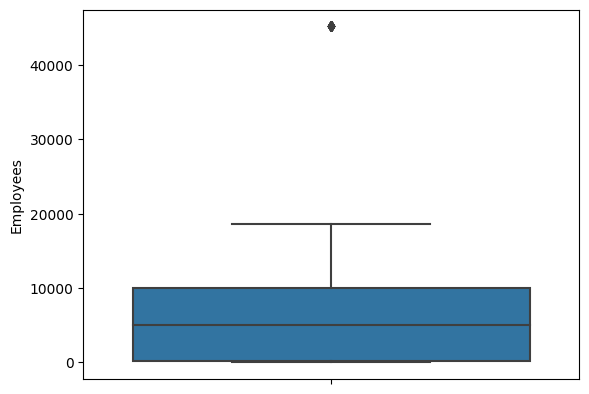

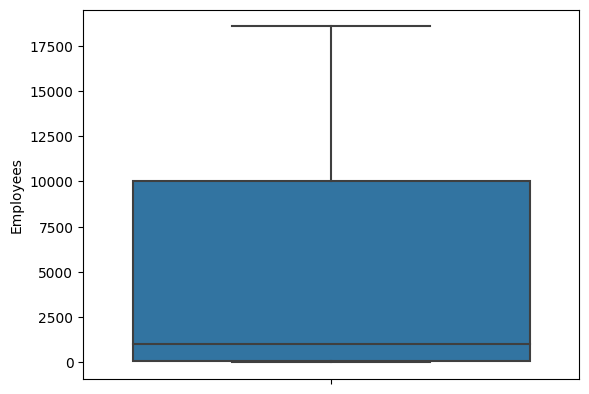

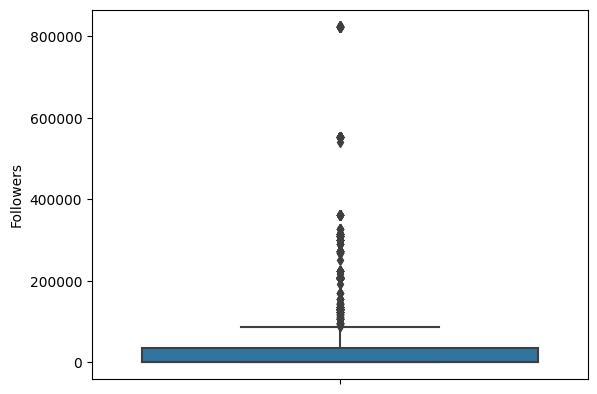

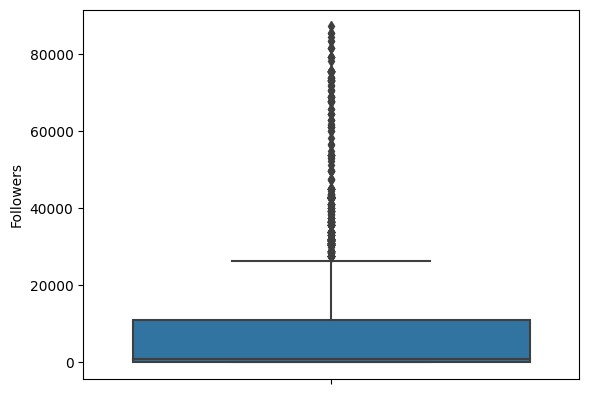

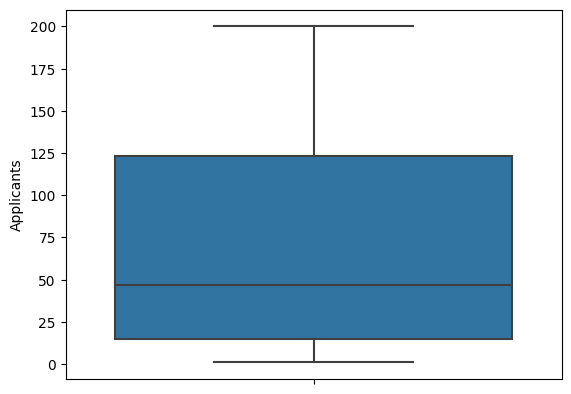

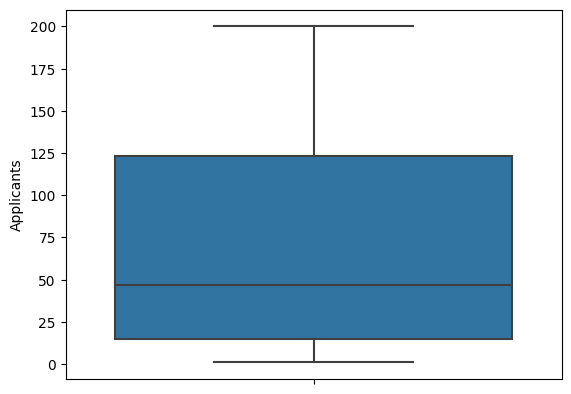

In [34]:
# imported searborn and matplotlib for visualiztion
import seaborn as sns
import matplotlib.pyplot as plt
# Removing Outlier from our selected columns
for c in Outlier_col:
    plt.figure()
    sns.boxplot(y=c,data=df)
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    df=df[(df[c]<=upper_limit) & (df[c]>=lower_limit)]
    plt.figure()
    sns.boxplot(y=c,data=df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 3 to 3207
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Job_Name       2575 non-null   object
 1   Company        2575 non-null   object
 2   City           2575 non-null   object
 3   Job_type       2575 non-null   object
 4   Employees      2575 non-null   int64 
 5   Followers      2575 non-null   int64 
 6   Applicants     2575 non-null   int64 
 7   Industry       2575 non-null   object
 8   Level          2575 non-null   object
 9   Involvment     2575 non-null   object
 10  skills         2575 non-null   object
 11  Job_skills     2575 non-null   object
 12  skills_skills  2575 non-null   object
dtypes: int64(3), object(10)
memory usage: 281.6+ KB


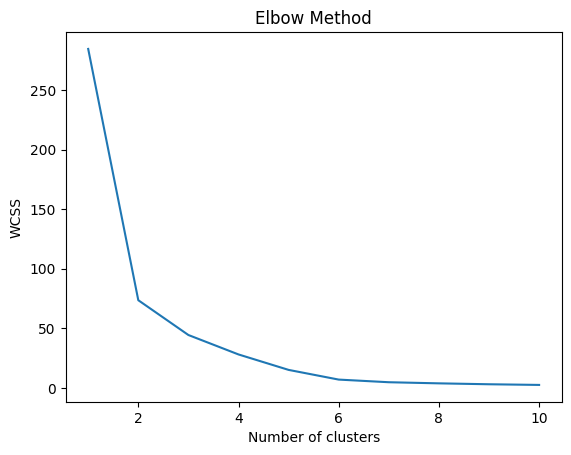

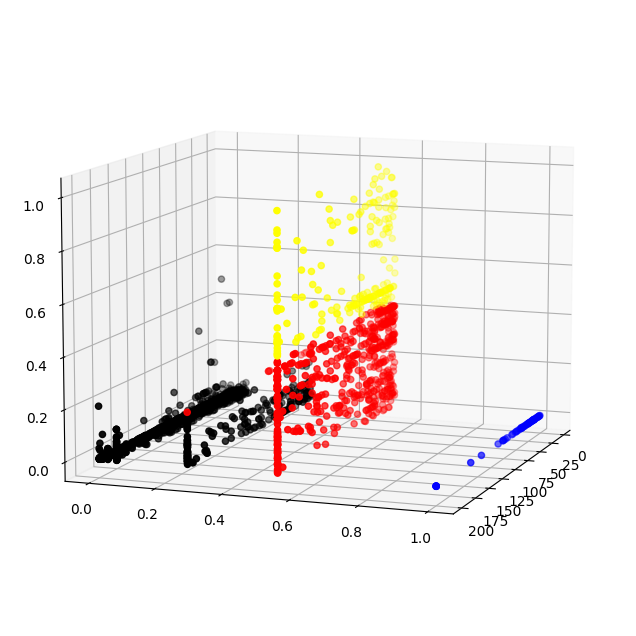

In [36]:
# Imported necessary library for kmeans clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Scaling our feature which are used in algorithm
scaler = MinMaxScaler()
df[['Employees', 'Followers']] = scaler.fit_transform(df[['Employees', 'Followers']])
# Calculating inertia for our Model
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=11000, n_init=10, random_state=13)
    kmeans.fit(df[['Employees', 'Followers']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Using Kmeans algorithm to get the required clusters 
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=11000, n_init=10, random_state=13)


# Predicting the class
df['Class'] = kmeans.fit_predict(df[['Employees', 'Followers']])

df_0=df[df['Class']==0]
df_1=df[df['Class']==1]
df_2=df[df['Class']==2]
df_3=df[df['Class']==3]

# Ploting the Scatter plot for the cluster which are Predict by our algorithm
fig1=plt.figure(figsize=(8,8))
ax=fig1.add_subplot(111,projection='3d')
ax.scatter(df_0.Applicants,df_0.Employees,df_0.Followers,color='red',label='cluster 0')
ax.scatter(df_1.Applicants,df_1.Employees,df_1.Followers,color='black',label='cluster 1')
ax.scatter(df_2.Applicants,df_2.Employees,df_2.Followers,color='yellow',label='cluster 2')
ax.scatter(df_3.Applicants,df_3.Employees,df_3.Followers,color='blue',label='cluster 3')
ax.view_init(10,20)
plt.show()





# Maping the class according to their company
df.Class.replace(0,'Class 1',inplace=True)
df.Class.replace(1,'Class 2',inplace=True)
df.Class.replace(2,'Class 3',inplace=True)
df.Class.replace(3,'Class 4',inplace=True)

# Generating Csv of our dataset 
df.to_csv('company_with_class.csv', index=False)

In [37]:
# value count of our Classes
df.Class.value_counts()

Class 2    1742
Class 1     549
Class 3     204
Class 4      80
Name: Class, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 3 to 3207
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Job_Name       2575 non-null   object 
 1   Company        2575 non-null   object 
 2   City           2575 non-null   object 
 3   Job_type       2575 non-null   object 
 4   Employees      2575 non-null   float64
 5   Followers      2575 non-null   float64
 6   Applicants     2575 non-null   int64  
 7   Industry       2575 non-null   object 
 8   Level          2575 non-null   object 
 9   Involvment     2575 non-null   object 
 10  skills         2575 non-null   object 
 11  Job_skills     2575 non-null   object 
 12  skills_skills  2575 non-null   object 
 13  Class          2575 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 301.8+ KB


In [39]:
# Converting skills  columns into lowercase
df=Convert_lower(df=df,columns=['skills_skills','skills','Job_skills'])

In [40]:
# Generating CSV from Dataframe
df.to_csv('final_Linked_Project_final_Output_DataFrame_final.csv',index=False)

True

True

if chala


0

,Job_Name,Company,City,Job_type,Employees,Followers,Applicants,Industry,Level,Involvment,skills,Job_skills,skills_skills,Class
3,Assistant Manager - FOSA Analyst,IndiGo (InterGlobe Aviation Ltd),Gurgaon,On-site,0.538615,0.216533,87,Airlines/Aviation,Mid-Senior level,Full-time,analytics business analytics communication dat...,"'downloading', 'fosa', 'database', 'analysis',...",,Class 1
6,Market Research Trainee,PW (PhysicsWallah),Noida,On-site,0.269280,0.050883,200,E-learning,Entry level,Full-time,analytical skills business insights communicat...,'nps',,Class 2
8,Operations Executive - Contractual (Cleartrip),Flipkart,Bengaluru,On-site,0.538615,0.514697,200,Computer Software,Entry level,Full-time,communication management information systems (...,"'job', 'teamcandidate', 'mis', 'excel', 'good'...",,Class 3
9,"SBS - India Analyst, Process || Gurgaon",WM,Gurgaon,On-site,0.538615,0.262816,16,Environmental Services,Mid-Senior level,Full-time,accounting software common sense communication...,"'reconciles', 'audits', 'speed', 'high school ...",,Class 1
12,"Specialist, Collections",XPO,Pune,On-site,0.538615,0.413848,200,Transportation/Trucking/Railroad,Entry level,Full-time,cash collection commerce communication custome...,"'join xpo logistics', 'fortune', 'cash', 'coll...",,Class 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,Manager IT Audit Risk Assurance,WSNE Consulting,Delhi,Hybrid,0.002747,0.000654,1,Staffing & Recruiting,Mid-Senior level,Full-time,communicationbackup & recovery systems busines...,"'exp', 'job', 'big4', 'assurance', 'big4', 'yo...",,Class 2
3202,Head - Staff Augmentation,BuyOnCloud Software Services,Mumbai,On-site,0.000592,0.000023,3,Management Consulting,Director,Full-time,analytical skillscandidate management delivery...,"'india', 'artificial intelligence', 'robotic p...",,Class 2
3205,Job openings on PL/SQL Developer,ESSENWARE PRIVATE LIMITED,Mumbai,On-site,0.002747,0.000367,41,Information Technology & Services,Entry level,Full-time,sqldatabase triggers oracle database pl/sql pe...,"'pl', 'client', 'mnc', 'cmmil5'",,Class 2
3206,IT Recruiter,SPAR Solutions,Pune,On-site,0.002747,0.001423,136,Information Technology & Services,Entry level,Full-time,communicationapplicant tracking systems boolea...,"'write', 'source', 'naukri', 'parse', 'perform...",,Class 2
